<h1>Image Classification</h1>

This notebook develops code for a multiclass classificaction problem based on the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset following the text [Hands-On Machine Learning](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/).

The dataset contains images of handwritten digits, and the goal is to classify images into 10 classes, corresponding to the digits 0-9.


<h3>Libraries</h3>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier

Let's load the dataset and create a training and test set.

In [3]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

We take some example to show how the images look like.

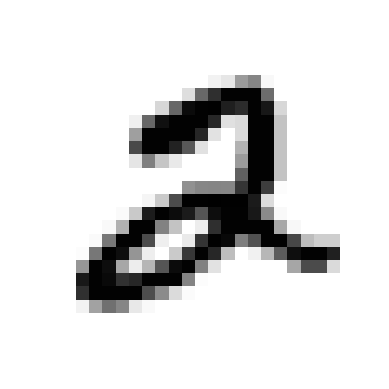

2

In [4]:
exmpl_data = X.iloc[5]
exmpl_data_reshaped = exmpl_data.values.reshape(28, 28)
plt.imshow(exmpl_data_reshaped, cmap=plt.cm.binary)
plt.axis("off")
plt.show()
y[5]

Train a stochastic gradient descent classifier usgin OvA strategy.

In [5]:
sgd_clf = SGDClassifier()

In [6]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([exmpl_data])

c:\Users\cozie\MNIST\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=uint8)

The prediction is correct. Let's see the decision score for each class.

In [7]:
sgd_clf.decision_function([exmpl_data])

c:\Users\cozie\MNIST\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[ -8877.14280765, -39645.86708806,   4530.25907746,
         -9359.4133775 , -18732.22696702,  -9956.32249681,
        -12418.1788449 , -17055.80324598,  -4841.82018306,
         -6613.84803447]])

Using a OvO strategy:

In [8]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier())
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([exmpl_data])

c:\Users\cozie\MNIST\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=uint8)

And using RandomForest(is already multiclass so no need to use OvA or OvO):

In [9]:
from sklearn.ensemble import RandomForestClassifier 


forest_clf = RandomForestClassifier()
forest_clf.fit(X_train,y_train)
forest_clf.predict([exmpl_data])

c:\Users\cozie\MNIST\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=uint8)

In [10]:
forest_clf.predict_proba([exmpl_data])

c:\Users\cozie\MNIST\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.01, 0.  , 0.9 , 0.03, 0.  , 0.  , 0.  , 0.03, 0.02, 0.01]])

The classifier estimates a probability of 89% that te image represents a 2.
Now evaluate using cross validation:


In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

array([0.87045, 0.87605, 0.8858 ])

By simply scaling the input we can get a better accuracy.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

c:\Users\cozie\MNIST\venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.8997 , 0.89325, 0.90405])

<h3>Error analysis</h3>

<function matplotlib.pyplot.show(close=None, block=None)>

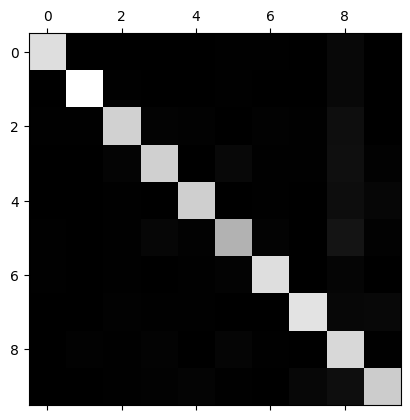

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
confusion = confusion_matrix(y_train, y_train_pred)
plt.matshow(confusion,cmap=plt.cm.gray)
plt.show

The digit 5 seem to be most problematic or have fewer training examples, so let's focus only on relative error instead of absolute error.

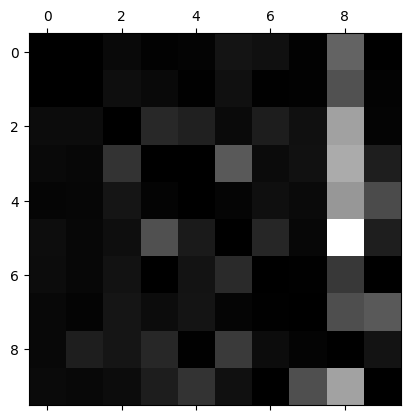

In [14]:
row_sum = confusion.sum(axis=1, keepdims=True)
relative_confusion = confusion / row_sum
np.fill_diagonal(relative_confusion,0)
plt.matshow(relative_confusion,cmap=plt.cm.gray)
plt.show()

It seems that the model missclassify images as 8's and has some problems with 5's and 3's.